# Fish Weight Prediction project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [5]:
df = pd.read_csv('C:/Users/karth/AI_in_Ent/fish-weight-prediction/Fish.csv')

In [6]:
print(df.head())
print(df.info())
print(df.describe())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None
            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  15

In [7]:
print(df.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [9]:
df_encoded = pd.get_dummies(df, columns=['Species'], drop_first=True)

X = df_encoded.drop('Weight', axis=1)
y = df_encoded['Weight']

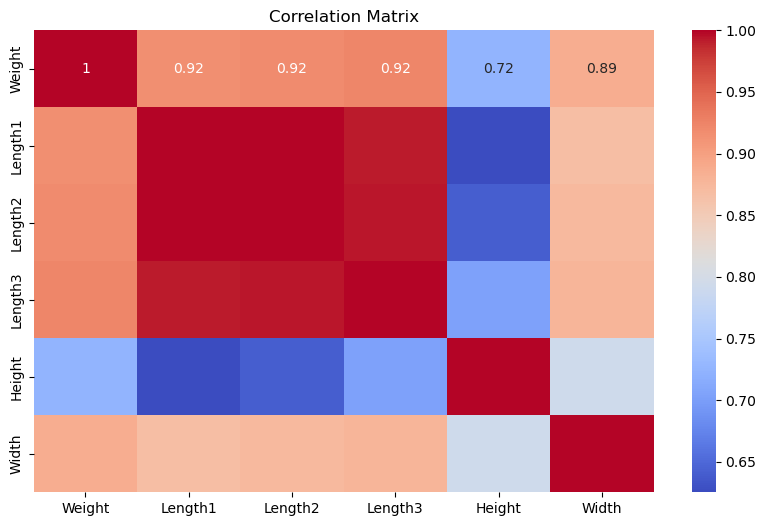

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
df_encoded = pd.get_dummies(df, columns=['Species'], drop_first=True)

In [14]:
X = df_encoded.drop('Weight', axis=1)
y = df_encoded['Weight']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
lr_pred = lr_model.predict(X_test_scaled)
print("Linear Regression Results:")
print(f"MSE: {mean_squared_error(y_test, lr_pred)}")
print(f"R2 Score: {r2_score(y_test, lr_pred)}")

Linear Regression Results:
MSE: 7007.383189854023
R2 Score: 0.9507352480054507


In [19]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [20]:
rf_pred = rf_model.predict(X_test_scaled)
print("Random Forest Results:")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"R2 Score: {r2_score(y_test, rf_pred)}")

Random Forest Results:
MSE: 4569.475534281245
R2 Score: 0.9678747297182965


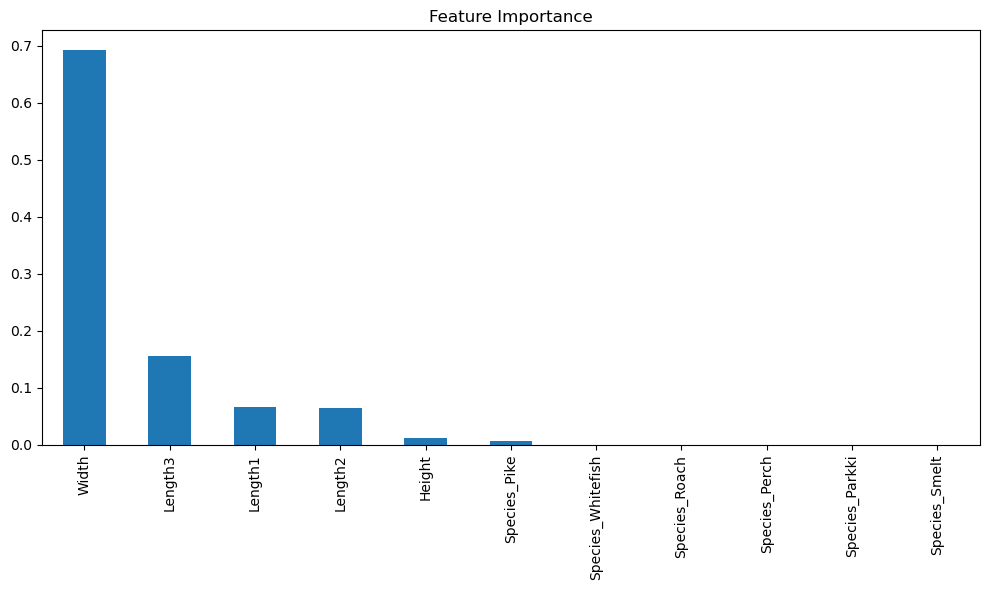

In [21]:
plt.figure(figsize=(10, 6))
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [22]:
with open('fish_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
    
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [23]:
model_columns = list(X.columns)
with open('model_columns.pkl', 'wb') as file:
    pickle.dump(model_columns, file)

print("Model saved successfully")

Model saved successfully
